In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
customer_dataset =  pd.read_csv('/content/Mall_Customers.csv')

In [ ]:
customer_dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
customer_dataset.shape

(200, 5)

In [ ]:
customer_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
customer_dataset.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
X = customer_dataset.iloc[:,[3,4]].values

In [ ]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [ ]:
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

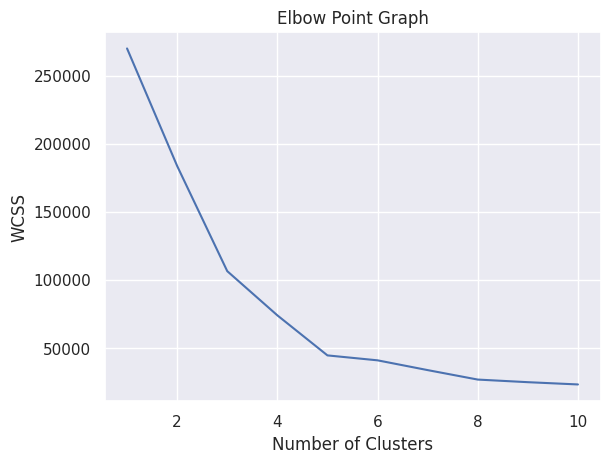

In [ ]:
sns.set()
plt.plot(range(1,11), wcss)
plt.title('Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans= KMeans(n_clusters=5, init='k-means++', random_state=42 )

Y = kmeans.fit_predict(X)
print(Y)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


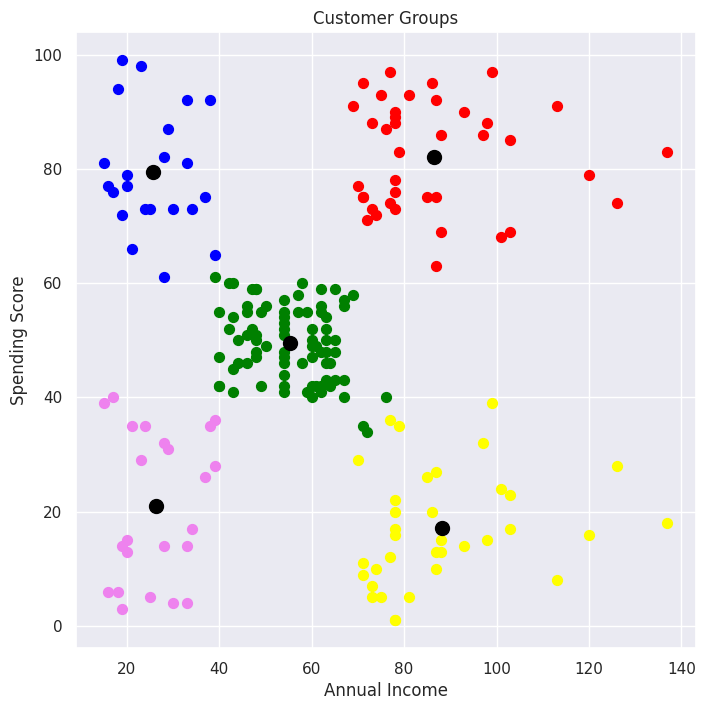

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='blue', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='yellow', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='violet', label='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='black', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [ ]:
customer_dataset['Cluster'] = Y
customer_dataset.to_csv('Customer_Segmentation_Results.csv', index=False)

print("Final dataset with cluster labels saved as 'Customer_Segmentation_Results.csv'")


Final dataset with cluster labels saved as 'Customer_Segmentation_Results.csv'


In [ ]:
cluster_summary = customer_dataset.groupby('Cluster').agg({
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean',
    'Age': 'mean',
    'CustomerID': 'count',
    'Gender': lambda x: x.mode()[0]  # Get the mode for categorical data
})
print(cluster_summary)

         Annual Income (k$)  Spending Score (1-100)        Age  CustomerID  \
Cluster                                                                      
0                 55.296296               49.518519  42.716049          81   
1                 86.538462               82.128205  32.692308          39   
2                 25.727273               79.363636  25.272727          22   
3                 88.200000               17.114286  41.114286          35   
4                 26.304348               20.913043  45.217391          23   

         Gender  
Cluster          
0        Female  
1        Female  
2        Female  
3          Male  
4        Female  


In [ ]:
cluster_sizes = customer_dataset['Cluster'].value_counts()
print(cluster_sizes)


Cluster
0    81
1    39
3    35
4    23
2    22
Name: count, dtype: int64


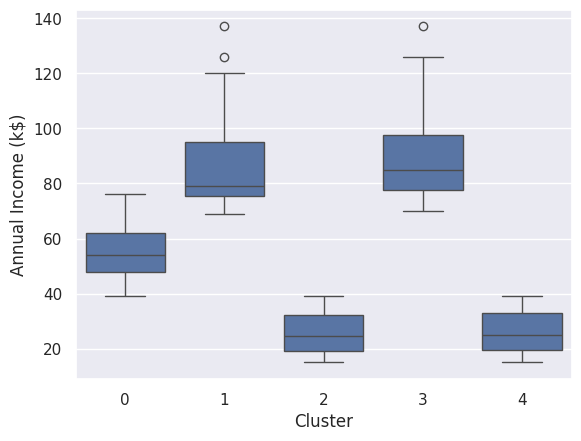

In [ ]:
sns.boxplot(x='Cluster', y='Annual Income (k$)', data=customer_dataset)
plt.show()


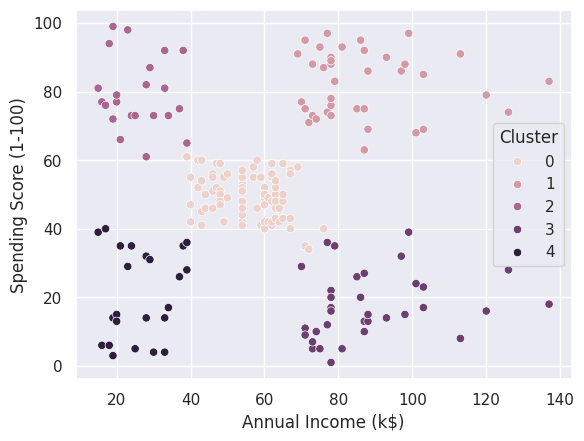

In [ ]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=customer_dataset)
plt.show()


In [ ]:
# Short descriptive labels with easier terms
cluster_labels = {
    0: 'Average',
    1: 'High Income, High Spend',
    2: 'Low Income, High Spend',
    3: 'High Income, Low Spend',
    4: 'Low Income, Low Spend'
}

# Map cluster labels to the new simple names
customer_dataset['Cluster_Description'] = customer_dataset['Cluster'].map(cluster_labels)

# Save the updated dataset to a CSV file
customer_dataset.to_csv('Customer_Segmentation_With_Labels.csv', index=False)
print("Dataset saved successfully!")


Dataset saved successfully!


In [ ]:
verified_data = pd.read_csv('Customer_Segmentation_With_Labels.csv')
verified_data.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,Cluster_Description
0,1,Male,19,15,39,4,"Low Income, Low Spend"
1,2,Male,21,15,81,2,"Low Income, High Spend"
2,3,Female,20,16,6,4,"Low Income, Low Spend"
3,4,Female,23,16,77,2,"Low Income, High Spend"
4,5,Female,31,17,40,4,"Low Income, Low Spend"


In [ ]:
# Load the saved file to verify
verified_data = pd.read_csv('Customer_Segmentation_Results.csv')
verified_data.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4
